In [ ]:
import keras
from keras.datasets import fashion_mnist

In [ ]:
fashion_data = fashion_mnist.load_data()
fashion_data

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

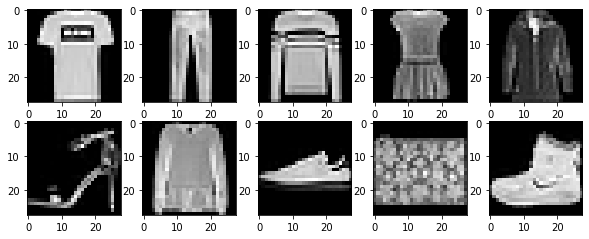

In [ ]:
(trainX, trainy), (testX, testy) = fashion_data
clas, index, number = np.unique(trainy, return_counts=True,return_index=True)
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(trainX[index[i]], cmap=plt.get_cmap('gray'))
plt.show()

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


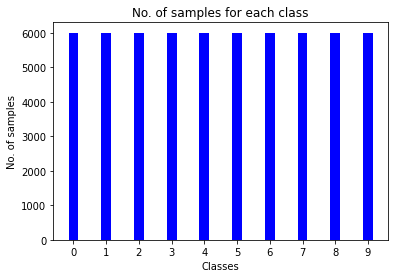

In [ ]:
distribution = np.column_stack((clas, number)) 
print (distribution)
plt.bar(clas, number, color ='blue', width = 0.3)
plt.xticks(clas)
plt.xlabel("Classes")
plt.ylabel("No. of samples")
plt.title("No. of samples for each class")
plt.show()

Yes the distribution is uniform. Each class is having 6000 samples making a total of 60K samples divided in 10 classes.

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

In [ ]:
sobel_x = np.array([
    [-1, 0, +1],
    [-2, 0, +2],
    [-1, 0, +1]])
sobel_y = np.array([
    [+1, +2, +1],
    [0, 0, 0],
    [-1, -2, -1]])

In [ ]:
def convolve(img, kernel):
  img_size=img.shape[0]
  kernel_size=kernel.shape[0]
  num_pixels = 0
  for i in range(img_size):
    added = i + kernel_size
    if added <= img_size:
      num_pixels += 1
  k = kernel.shape[0]
  convolved_img = np.zeros(shape=(num_pixels, num_pixels))

  for i in range(num_pixels):
    for j in range(num_pixels):
      mat = img[i:i+k, j:j+k]
      convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
  return convolved_img

In [ ]:
feature_map_list=[]
for i in range(10):
  img_sobel_x = convolve(np.array(trainX[index[i]]), sobel_x) # x
  img_sobel_y = convolve(np.array(trainX[index[i]]), sobel_y) # y
  feature_map = np.sqrt(img_sobel_x**2 + img_sobel_y**2) # Feature Map = √(x^2+y^2)
  feature_map_list.append(feature_map)

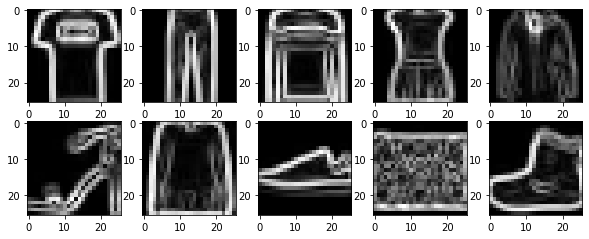

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(feature_map_list[i], cmap=plt.get_cmap('gray'))
plt.show()

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
def MyModel():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2, noise_shape = None, seed = None))
  model.add(keras.layers.Flatten())
  model.add(Dense(10, activation='softmax'))
  return model

3. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**


In [ ]:
def cross_entropy(y,y_pre):
  loss=-tf.math.reduce_sum(y*tf.math.log(y_pre))
  t1=float(y_pre.shape[0])
  loss1=loss/t1
  return loss1

In [ ]:
trainX = np.array(trainX, dtype='float32')
testX = np.array(testX, dtype='float32')
trainy = np.array(trainy, dtype='float32')
testy = np.array(testy, dtype='float32')

In [ ]:
trainX = trainX / 255
testX = testX / 255

In [ ]:
im_rows = 28
im_cols = 28
im_shape = (im_rows, im_cols, 1)

trainX = trainX.reshape(trainX.shape[0], *im_shape)
testX = testX.reshape(testX.shape[0], *im_shape)

print('x_train shape: {}'.format(trainX.shape))
print('x_test shape: {}'.format(testX.shape))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [ ]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

4. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

In [ ]:
Training_Loss=[]

In [ ]:
# SGD
model1=MyModel()
model1.compile(optimizer='sgd', loss=cross_entropy, metrics=['accuracy'])
history1 = model1.fit(trainX, trainy, epochs=10)
loss1=history1.history['loss']
Training_Loss.append(loss1[-1])

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.9127 - accuracy: 0.6758
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5610 - accuracy: 0.7950
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.4961 - accuracy: 0.8216
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4631 - accuracy: 0.8330
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4410 - accuracy: 0.8411
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4234 - accuracy: 0.8476
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4110 - accuracy: 0.8535
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3994 - accuracy: 0.8563
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3890 - accuracy: 0.8595
Epoch 10/10
1875/1875 [==============================] - 54s 29m

In [ ]:
# RMSprop
model2=MyModel()
model2.compile(optimizer='RMSprop', loss=cross_entropy, metrics=['accuracy'])
history2 = model2.fit(trainX, trainy, epochs=10)
loss2=history2.history['loss']
Training_Loss.append(loss2[-1])

Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.4954 - accuracy: 0.8201
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3519 - accuracy: 0.8742
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3126 - accuracy: 0.8884
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2924 - accuracy: 0.8948
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2784 - accuracy: 0.9011
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2680 - accuracy: 0.9047
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2592 - accuracy: 0.9081
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2557 - accuracy: 0.9089
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2484 - accuracy: 0.9111
Epoch 10/10
1875/1875 [==============================] - 58s 31m

In [ ]:
# adam
model3=MyModel()
model3.compile(optimizer='adam', loss=cross_entropy, metrics=['accuracy'])
history3 = model3.fit(trainX, trainy, epochs=10)
loss3=history3.history['loss']
Training_Loss.append(loss3[-1])

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.5011 - accuracy: 0.8202
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3471 - accuracy: 0.8744
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3100 - accuracy: 0.8879
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2843 - accuracy: 0.8964
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2651 - accuracy: 0.9038
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2530 - accuracy: 0.9086
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2402 - accuracy: 0.9136
Epoch 8/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2305 - accuracy: 0.9154
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2242 - accuracy: 0.9186
Epoch 10/10
1875/1875 [==============================] - 55s 29m

In [ ]:
# Adagrad
model4=MyModel()
model4.compile(optimizer='Adagrad', loss=cross_entropy, metrics=['accuracy'])
history4 = model4.fit(trainX, trainy, epochs=10)
loss4=history4.history['loss']
Training_Loss.append(loss4[-1])

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.5467 - accuracy: 0.4953
Epoch 2/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.9001 - accuracy: 0.6771
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.7861 - accuracy: 0.7173
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.7278 - accuracy: 0.7364
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.6871 - accuracy: 0.7503
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6597 - accuracy: 0.7601
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.6346 - accuracy: 0.7674
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6186 - accuracy: 0.7726
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6015 - accuracy: 0.7798
Epoch 10/10
1875/1875 [==============================] - 53s 28m

In [ ]:
print(Training_Loss)

[0.38105320930480957, 0.24560418725013733, 0.2164572924375534, 0.5900447368621826]


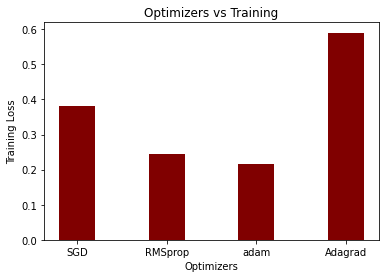

In [ ]:
Optimizers=["SGD","RMSprop","adam","Adagrad"]
plt.bar(Optimizers, Training_Loss, color ='maroon',width = 0.4)
plt.xlabel('Optimizers')
plt.ylabel('Training Loss')
plt.title('Optimizers vs Training')
plt.show()

**Observations**

Training Loss varies in all the optimizers. Adagrad is giving highest loss of around 0.6 while adam has a pretty much low loss of around 0.2.

So in the upcoming observations we will be using adam as our optimizer.

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**

In [ ]:
# Hyperparameters :
# One Conv2D layer with 64 filters
# Dropout rate = 0.1
# activation = relu
# Output activation = softmax
def MyModel_Improved():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.1, noise_shape = None, seed = None))
  model.add(keras.layers.Flatten())
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
loss_Improved=[]
train_acc=[]
test_acc=[]
for epoch in range(1,11):
  model3_Improved=MyModel_Improved()
  model3_Improved.compile(optimizer='adam', loss=cross_entropy, metrics=['accuracy'])
  history3_Improved = model3_Improved.fit(trainX, trainy, epochs=epoch)
  loss3_Improved=history3_Improved.history['loss']
  train_acc3=history3_Improved.history['accuracy']
  test3=model3_Improved.predict(testX)
  Er3=((testy-test3)**2)/2
  Accuracy_test3=1-Er3.mean() 
  loss_Improved.append(loss3_Improved[-1])
  train_acc.append(train_acc3[-1])
  test_acc.append(Accuracy_test3)

1875/1875 [==============================] - 48s 25ms/step - loss: 0.4455 - accuracy: 0.8427
Epoch 1/2
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4445 - accuracy: 0.8431
Epoch 2/2
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3214 - accuracy: 0.8863
Epoch 1/3
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4383 - accuracy: 0.8473
Epoch 2/3
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3174 - accuracy: 0.8885
Epoch 3/3
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2882 - accuracy: 0.8997
Epoch 1/4
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4505 - accuracy: 0.8421
Epoch 2/4
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3238 - accuracy: 0.8855
Epoch 3/4
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2918 - accuracy: 0.8956
Epoch 4/4
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2728

In [ ]:
print(loss_Improved)

[0.4455451965332031, 0.32138776779174805, 0.2881535291671753, 0.27283966541290283, 0.2581689655780792, 0.24543319642543793, 0.23241287469863892, 0.2217513769865036, 0.21413463354110718, 0.20671629905700684]


In [ ]:
print(train_acc)

[0.8427333235740662, 0.8862833380699158, 0.8996666669845581, 0.9024166464805603, 0.9074666500091553, 0.9123666882514954, 0.9160000085830688, 0.9200000166893005, 0.9215499758720398, 0.925083339214325]


In [ ]:
print(test_acc)

[0.9907382829114795, 0.99103051610291, 0.9914755374193192, 0.9919907692819834, 0.9923520088195801, 0.9924926580861211, 0.9923090287484229, 0.9924476128071547, 0.9927420006133616, 0.992699128575623]


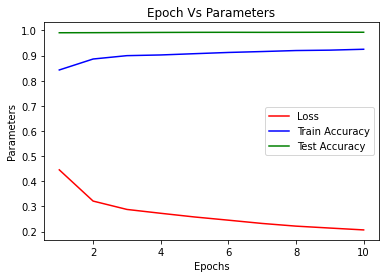

In [ ]:
epochs=[1,2,3,4,5,6,7,8,9,10]
plt.plot(epochs, loss_Improved, color ='red',label='Loss')
plt.plot(epochs, train_acc, color ='blue',label='Train Accuracy')
plt.plot(epochs, test_acc, color ='green',label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Parameters')
plt.title('Epoch Vs Parameters')
plt.show()

In [ ]:
# Hyperparameters :
# Two Conv2D layer with 64 filters
# Dropout rate = 0.3
# activation = relu
# Output activation = softmax
def MyModel_Improved():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3, noise_shape = None, seed = None))
  model.add(keras.layers.Flatten())
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
loss_Improved=[]
train_acc=[]
test_acc=[]
for epoch in range(1,11):
  model3_Improved=MyModel_Improved()
  model3_Improved.compile(optimizer='adam', loss=cross_entropy, metrics=['accuracy'])
  history3_Improved = model3_Improved.fit(trainX, trainy, epochs=epoch)
  loss3_Improved=history3_Improved.history['loss']
  train_acc3=history3_Improved.history['accuracy']
  test3=model3_Improved.predict(testX)
  Er3=((testy-test3)**2)/2
  Accuracy_test3=1-Er3.mean() 
  loss_Improved.append(loss3_Improved[-1])
  train_acc.append(train_acc3[-1])
  test_acc.append(Accuracy_test3)

1875/1875 [==============================] - 68s 36ms/step - loss: 0.4831 - accuracy: 0.8267
Epoch 1/2
1875/1875 [==============================] - 69s 36ms/step - loss: 0.4933 - accuracy: 0.8238
Epoch 2/2
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3513 - accuracy: 0.8743
Epoch 1/3
1875/1875 [==============================] - 68s 36ms/step - loss: 0.5015 - accuracy: 0.8206
Epoch 2/3
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3595 - accuracy: 0.8720
Epoch 3/3
1875/1875 [==============================] - 67s 35ms/step - loss: 0.3229 - accuracy: 0.8840
Epoch 1/4
1875/1875 [==============================] - 66s 35ms/step - loss: 0.4924 - accuracy: 0.8231
Epoch 2/4
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3554 - accuracy: 0.8719
Epoch 3/4
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3222 - accuracy: 0.8834
Epoch 4/4
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2982

In [ ]:
print(loss_Improved)

In [ ]:
print(train_acc)

In [ ]:
print(test_acc)

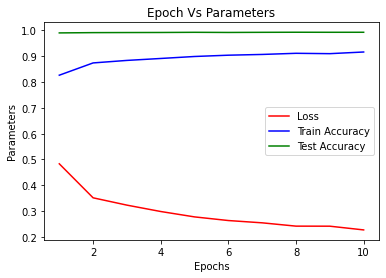

In [ ]:
epochs=[1,2,3,4,5,6,7,8,9,10]
plt.plot(epochs, loss_Improved, color ='red',label='Loss')
plt.plot(epochs, train_acc, color ='blue',label='Train Accuracy')
plt.plot(epochs, test_acc, color ='green',label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Parameters')
plt.title('Epoch Vs Parameters')
plt.show()

**Reportings**

When instead of a Conv layer of 32 filters and another of 64 filters and then a single Conv layer of 64 filters with dropout rate of 0.1 is taken then the accuracy of ADAM optimizer has increased most of the time.

When we used two layers of Conv with 64 filters each with dropout rate of 0.3 the accuracy of adam optimizer has decreased.